In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
########################
### INFOS !!! ##########
# History: 1 s
# Horizon: 3 s
# ADE & FDE evaluated on most likely 1

In [3]:
keys = ['regular', 'generalization']
boards = dict()
for board_file in keys:
    with open(f'INTERACTION_{board_file}_board', 'r') as f:
        lines = f.readlines()

    lines = [line.strip() for line in lines if line.strip() != '']
    num_featurues = 6
    num_entries = int(len(lines)/num_featurues)
    board = list()
    for entry_id in range(num_entries):
        entry = list()
        for i in range(num_featurues):
            line = lines[entry_id * num_featurues+ i]
            if not(i in [1, num_featurues-1]):
                line = float(line)
            entry.append(line)
        board.append(entry)

    board = pd.DataFrame(board)
    board.rename(columns = {0:'Ranking', 1:'model',2:f'{board_file}_ADE', 3:f'{board_file}_FDE',4:f'{board_file}_minADE',5:'submission'}, inplace=True)
    board.drop(columns = ['submission', 'Ranking'], inplace=True)
    boards[board_file] = board

In [4]:
boards_join = pd.merge(left = boards['regular'], right = boards['generalization'], how = 'inner', on = 'model')

In [5]:
boards_join.sort_values('regular_minADE', inplace = True)
num_models = len(boards_join)

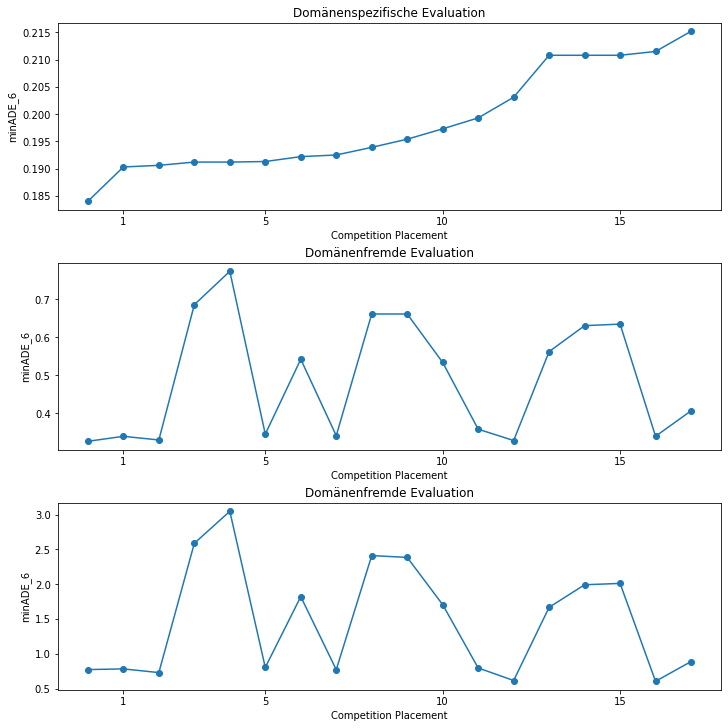

In [6]:
fig, ax = plt.subplots(3,1,constrained_layout=True, figsize=(10,10))


ax[0].scatter(range(num_models), boards_join['regular_minADE'].values)
ax[0].plot(range(num_models), boards_join['regular_minADE'].values)
ax[0].set_xticks([1,5,10,15]);
ax[0].set_ylabel('minADE_6');
ax[0].set_title('Domänenspezifische Evaluation');
ax[0].set_xlabel('Competition Placement');


ax[1].scatter(range(num_models), boards_join['generalization_minADE'].values)
ax[1].plot(range(num_models), boards_join['generalization_minADE'].values)
ax[1].set_xticks([1,5,10,15]);
ax[1].set_xlabel('Competition Placement');
ax[1].set_ylabel('minADE_6');
ax[1].set_title('Domänenfremde Evaluation');


rel_gen_err = (boards_join['generalization_minADE'] - boards_join['regular_minADE']) / boards_join['regular_minADE']

ax[2].scatter(range(num_models), rel_gen_err)
ax[2].plot(range(num_models), rel_gen_err)
ax[2].set_xticks([1,5,10,15]);
ax[2].set_xlabel('Competition Placement');
ax[2].set_ylabel('minADE_6');
ax[2].set_title('Domänenfremde Evaluation');

In [25]:
boards_join['generalization_minADE_sorted'] = np.sort(boards_join['generalization_minADE'].values)
boards_join[['regular_minADE', 'generalization_minADE', 'generalization_minADE_sorted']].to_excel('INTERACTION.xlsx')